# Salinity Plots

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import time
%matplotlib inline
from salishsea_tools import utilities
import errno
import os
import sys
from datetime import datetime, timedelta
from dateutil.parser import parse

<h2>Heat maps of salinity profiles (depth) vs. time over output record for all three locations</h2>

<h2>Heat maps of vertical velocity (depth) vs. time over output record for all three locations (use red-blue scale with white zero)</h2>

In [109]:
# read in vertical velocities
sog2015 = xr.open_dataset('Vertical_velocity_profiles/sog2015.nc').vovecrtz
data = np.abs(sog2015.values)
time = sog2015.time_counter.values
depths = sog2015.depthw.values

In [220]:
def _convert_timestamp(time):
    """Convert datetime.datetime to string in datetime64[s] format
    :arg time: datetime.datetime object
    :return datetime64: str in datetime64[s] format
    """
    year, month, day, hour, minute, second = str(time.year), str(time.month), str(time.day), str(time.hour), str(time.minute), str(time.second)
    if len(month) < 2:
        month = '0' + month
    if len(day) < 2:
        day = '0' + day
    if len(hour) < 2:
        hour = '0' + hour
    if len(minute) < 2:
        minute = '0' + minute
    if len(second) < 2:
        second = '0' + second
    datetime64 = '{}-{}-{}T{}:{}:{}'.format(year, month, day, hour, minute, second)
    return datetime64

In [221]:
class vertical_velocities():
    def __init__(self, xr_path):         
        xr_file = xr.open_dataset(xr_path)
        self.xr_file = xr_file
        self.begin_time = None
        self.begin_time = None
        self.top_depth = None
        self.bottom_depth = None
        self.__plot__()
    def __plot__(self):
        fig = plt.figure(figsize = (20,10))
        if self.begin_time is None:
            self.xr_file.vovecrtz.T.plot()
        else:
            self.xr_file.vovecrtz.sel(time_counter = slice(self.begin_time, self.end_time)).T.plot()
        plt.gca().invert_yaxis()
    def plot_max(self):
        xrfile = self.xr_file
        data = np.abs(xrfile.vovecrtz.values)
        time = xrfile.time_counter.values
        depths = xrfile.depthw.values
        max_depths = []
        for i in data:
            max_depths.append(float(depths[np.where(i == i.max())][0]))
        plt.plot(time, max_depths)
    def time_slice(self, begin, end):
        daterange = [parse(t) for t in [begin, end]]
        assert(np.diff(daterange)[0].days >= 0), "Invalid Date Range"
        self.begin_time = _convert_timestamp(daterange[0])
        self.end_time = _convert_timestamp(daterange[1])
        self.__plot__()

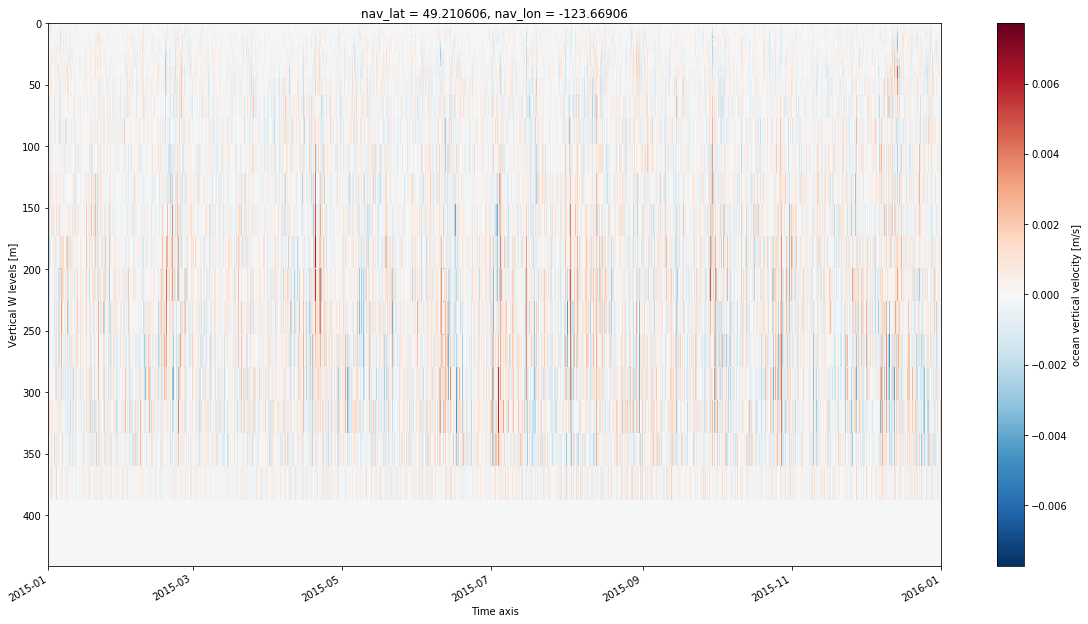

In [222]:
a = vertical_velocities('Vertical_velocity_profiles/sog2015.nc')

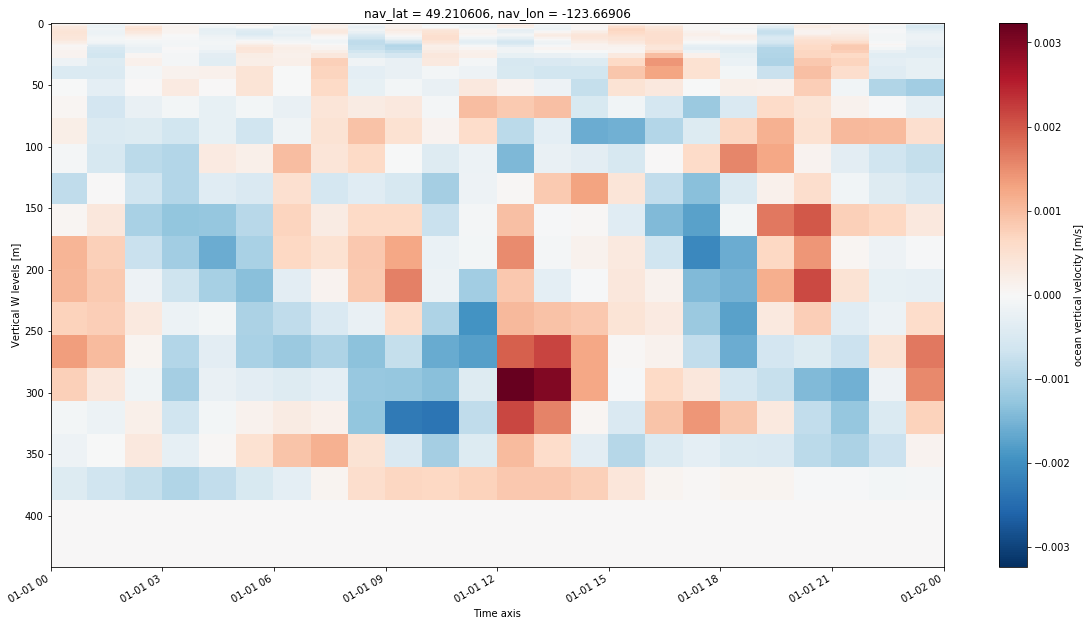

In [223]:
a.time_slice('1 Jan 2015', '2 Jan 2015')